In [1]:
import os
import glob as gb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Need a paper to choose suitable size
img_size = 64
channel = 1

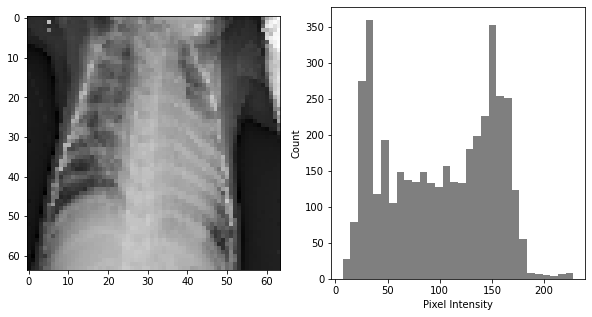

In [2]:
# Load .npy arrays
# X_train, X_test contain the images as numpy arrays, while y_train, y_test contain the class of each image 
loaded_X_train = np.load('./X_train.npy')
loaded_X_test = np.load('./X_test.npy')
loaded_y_train = np.load('./y_train.npy')
loaded_y_test = np.load('./y_test.npy')

# Investigate the pixel value distribution
def plotHistogram(a):
    plt.figure(figsize=(10, 5))

    # print image
    plt.subplot(1, 2, 1)
    plt.imshow(a, cmap='gray')  # Use the 'gray' colormap for grayscale images

    # plot pixel value distribution beside
    histo = plt.subplot(1, 2, 2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')

    n_bins = 30
    plt.hist(a.flatten(), bins=n_bins, lw=0, color='k', alpha=0.5)  # Flatten the single-channel grayscale image

plotHistogram(loaded_X_train[np.random.randint(len(loaded_X_train))])

# Flatten the images into a 2d array, for model training and testing
X_train = loaded_X_train.reshape([-1, np.product((img_size, img_size, channel))])
X_test = loaded_X_test.reshape([-1, np.product((img_size, img_size, channel))])

y_train = loaded_y_train
y_test = loaded_y_test

from sklearn.utils import shuffle as shf
# shuffle train and test data sets in a consistent way
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

# Preprocessing: oversampling using ADASYN

In [3]:
from sklearn.preprocessing import StandardScaler

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from imblearn.over_sampling import ADASYN

# applying ADASYN to X_train and y_train to generate new samples to overcome the imbalance
from collections import Counter
smote = ADASYN(random_state = 11)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print('Before SMOTE : ',Counter(y_train))
print('After SMOTE : ',Counter(y_train_res))

# printing X_train and y_train shape after SMOTE
print(X_train_res.shape)
print(y_train_res.shape)

Before SMOTE :  Counter({1: 3875, 0: 1341})
After SMOTE :  Counter({1: 3875, 0: 3874})
(7749, 4096)
(7749,)


# Model investigation and analysis

In [4]:
from lazypredict.Supervised import LazyClassifier

# Create a LazyClassifier instance and fit the training data
clf = LazyClassifier(verbose=0,
                        ignore_warnings=True,
                        custom_metric=None,
                        predictions=True,
                        random_state=12,
                        classifiers='all')
LazyClassifier()
# model, predictions = clf.fit(X_train_res, x_test,y_train_res, y_test)
model, predictions = clf.fit(X_train, X_test,y_train, y_test)
model

100%|██████████| 29/29 [11:57<00:00, 24.73s/it]  


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.80,0.80,0.81,0.97
BernoulliNB,0.78,0.76,0.76,0.78,1.22
LogisticRegression,0.80,0.75,0.75,0.79,2.78
LinearSVC,0.79,0.74,0.74,0.78,12.21
SVC,0.80,0.74,0.74,0.78,13.84
ExtraTreesClassifier,0.80,0.74,0.74,0.78,6.54
CalibratedClassifierCV,0.79,0.73,0.73,0.77,49.87
PassiveAggressiveClassifier,0.78,0.73,0.73,0.77,2.97
GaussianNB,0.74,0.72,0.72,0.74,1.19


In [5]:
top_10= model.sort_values(by='Accuracy', ascending=False).head(12)
print(top_10) 

                             Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                         
NearestCentroid                  0.81               0.80     0.80      0.81   
LogisticRegression               0.80               0.75     0.75      0.79   
SVC                              0.80               0.74     0.74      0.78   
ExtraTreesClassifier             0.80               0.74     0.74      0.78   
LinearSVC                        0.79               0.74     0.74      0.78   
CalibratedClassifierCV           0.79               0.73     0.73      0.77   
BernoulliNB                      0.78               0.76     0.76      0.78   
PassiveAggressiveClassifier      0.78               0.73     0.73      0.77   
LGBMClassifier                   0.78               0.71     0.71      0.75   
RandomForestClassifier           0.78               0.71     0.71      0.75   
XGBClassifier                    0.78               